<a href="https://colab.research.google.com/github/AsianaHolloway/Kyphosis-Disease-Classification-using-Python-and-Seaborn/blob/main/Kyphosis_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

sns.set(context='notebook', style='whitegrid')
print('Versions -> pandas', pd.__version__, '| seaborn', sns.__version__)


Versions -> pandas 2.2.2 | seaborn 0.13.2


In [ ]:
# Manual upload of kyphosis.csv
from google.colab import files
import pandas as pd

print("📂 Please select your kyphosis.csv file to upload:")
uploaded = files.upload()  # opens a file picker on your computer

# Detect and load the uploaded file
csv_name = list(uploaded.keys())[0]
df = pd.read_csv(csv_name)

# Clean if necessary (some versions have an extra unnamed index column)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = [c.capitalize() for c in df.columns]  # make consistent capitalization

print("✅ Uploaded and loaded successfully! Shape:", df.shape)
df.head()


📂 Please select your kyphosis.csv file to upload:


Saving kyphosis.csv to kyphosis.csv
✅ Uploaded and loaded successfully! Shape: (81, 4)


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
# Step 3: Explore the data
print("Shape:", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nClass distribution (Kyphosis):")
print(df['Kyphosis'].value_counts())
print("\nClass distribution (normalized):")
print(df['Kyphosis'].value_counts(normalize=True).round(3))

df.describe(include='all')


Shape: (81, 4)

Data types:
Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

Missing values per column:
Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

Class distribution (Kyphosis):
Kyphosis
absent     64
present    17
Name: count, dtype: int64

Class distribution (normalized):
Kyphosis
absent     0.79
present    0.21
Name: proportion, dtype: float64


,Kyphosis,Age,Number,Start
count,81,81.000000,81.000000,81.000000
unique,2,NaN,NaN,NaN
top,absent,NaN,NaN,NaN
freq,64,NaN,NaN,NaN
mean,NaN,83.654321,4.049383,11.493827
std,NaN,58.104251,1.619423,4.883962
min,NaN,1.000000,2.000000,1.000000
25%,NaN,26.000000,3.000000,9.000000
50%,NaN,87.000000,4.000000,13.000000
75%,NaN,130.000000,5.000000,16.000000


In [ ]:
# Step 4: Encode the target column
df_corr = df.copy()
df_corr['Kyphosis_num'] = df_corr['Kyphosis'].map({'absent': 0, 'present': 1})

# Compute Pearson correlations
corr = df_corr[['Kyphosis_num', 'Age', 'Number', 'Start']].corr()
corr


,Kyphosis_num,Age,Number,Start
Kyphosis_num,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


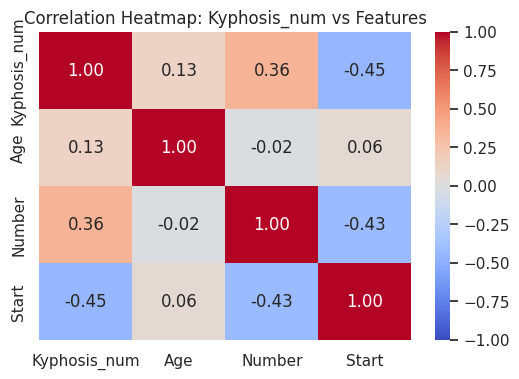

In [ ]:
# Step 5: Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Heatmap: Kyphosis_num vs Features")
plt.show()


In [ ]:
# Step 6: Point-biserial correlation test
y = df_corr['Kyphosis_num'].values
pbs_results = {}

for col in ['Age', 'Number', 'Start']:
    r, p = pointbiserialr(y, df_corr[col].values)
    pbs_results[col] = {'r': float(r), 'p_value': float(p)}

pd.DataFrame(pbs_results).T.sort_values('r', ascending=False)


,r,p_value
Number,0.360935,0.000932
Age,0.126465,0.260582
Start,-0.445943,0.000030


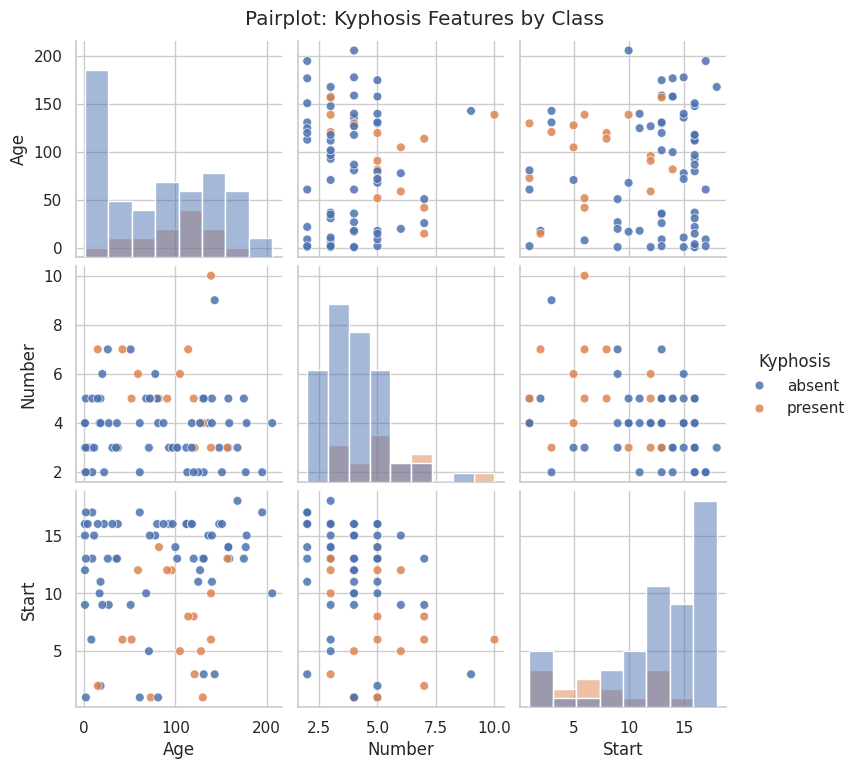

In [ ]:
# Step 7: Pairplot for EDA
pp = sns.pairplot(
    data=df,
    vars=['Age', 'Number', 'Start'],
    hue='Kyphosis',
    kind='scatter',
    diag_kind='hist',
    plot_kws={'alpha': 0.85, 's': 40, 'edgecolor': 'white'}
)
pp.fig.suptitle("Pairplot: Kyphosis Features by Class", y=1.02)
plt.show()


Decision Tree Accuracy: 0.7619047619047619

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      absent       0.78      0.93      0.85        15
     present       0.67      0.33      0.44         6

    accuracy                           0.76        21
   macro avg       0.72      0.63      0.65        21
weighted avg       0.75      0.76      0.73        21



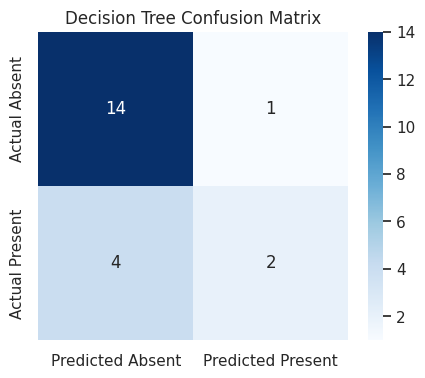

In [ ]:
# Import required ML packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target column (absent=0, present=1)
df['Kyphosis_encoded'] = df['Kyphosis'].map({'absent': 0, 'present': 1})

# Define features (inputs) and label (output)
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Display Decision Tree accuracy and classification report
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, dt_pred, target_names=['absent','present']))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Absent','Predicted Present'],
            yticklabels=['Actual Absent','Actual Present'])
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with n_estimators=150
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Accuracy and report
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred, target_names=['absent','present']))


Random Forest Accuracy: 0.7619047619047619

Classification Report (Random Forest):
              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        15
     present       1.00      0.17      0.29         6

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21



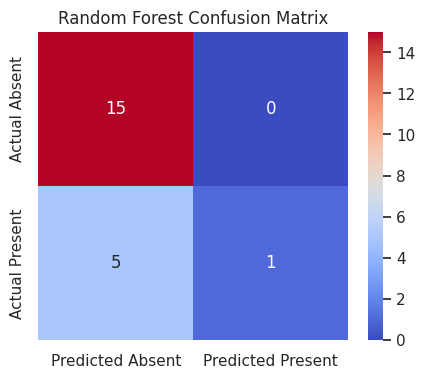

In [ ]:
# Create a confusion matrix for the Random Forest model
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(rf_cm, annot=True, cmap='coolwarm', fmt='d',
            xticklabels=['Predicted Absent','Predicted Present'],
            yticklabels=['Actual Absent','Actual Present'])
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
print("\nFinal Classification Report – Random Forest:")
print(classification_report(y_test, rf_pred, target_names=['absent','present']))



Final Classification Report – Random Forest:
              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        15
     present       1.00      0.17      0.29         6

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21

